In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
w = 3
y, x = np.mgrid[-w:w:100j, -w:w:100j]
u = -1 - x ** 2 + y
v = 1 + x - y ** 2
speed = np.sqrt(u ** 2 + v ** 2)

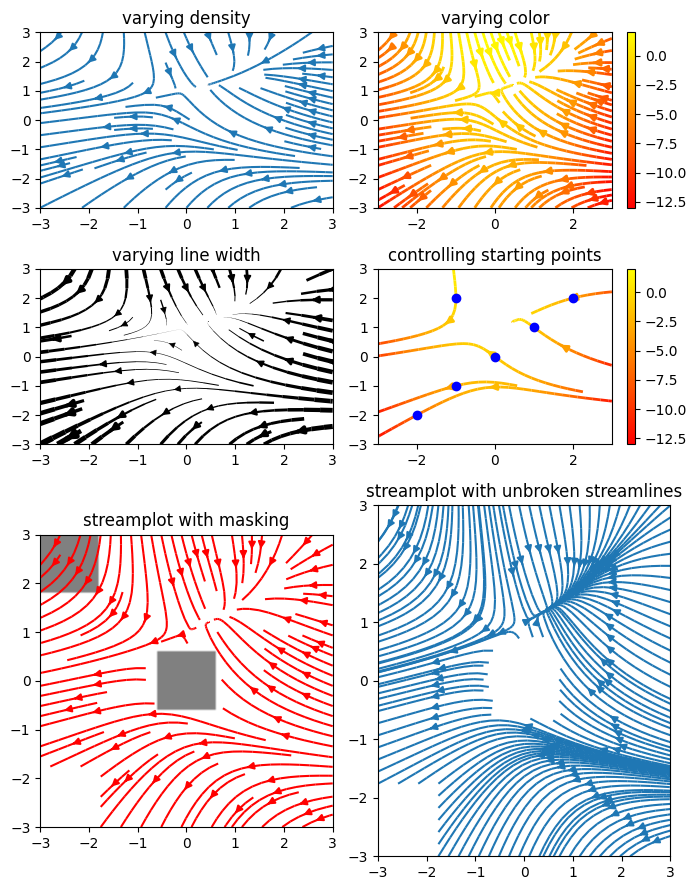

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(7, 9), height_ratios=[1, 1, 2])
axs = axs.flat


# varying density along a streamline
axs[0].streamplot(x, y, u, v, density=[0.5, 1])
axs[0].set_title("varying density")


# varying color along a streamline
strm = axs[1].streamplot(x, y, u, v, color=u, linewidth=2, cmap="autumn")
fig.colorbar(strm.lines, ax=axs[1])
axs[1].set_title("varying color")


# varying line width along a streamline
lw = 5 * speed / speed.max()
axs[2].streamplot(x, y, u, v, density=0.6, color="k", linewidth=lw)
axs[2].set_title("varying line width")


# controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])
strm = axs[3].streamplot(
    x, y, u, v, color=u, linewidth=2,
    cmap="autumn", start_points=seed_points.T
)
fig.colorbar(strm.lines, ax=axs[3])
axs[3].set_title("controlling starting points")

# displaying the starting points with blue symbols.
axs[3].plot(seed_points[0], seed_points[1], "bo")
axs[3].set(xlim=(-w, w), ylim=(-w, w))


# create a mask
mask = np.zeros(u.shape, dtype=bool)
mask[40:60, 40:60] = True
mask[:20, :20] = np.nan
u = np.ma.array(u, mask=mask)

axs[4].streamplot(x, y, u, v, color="r")
axs[4].set_title("streamplot with masking")
axs[4].imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap="gray", aspect="auto")
axs[4].set_aspect("equal")


axs[5].streamplot(x, y, u, v, broken_streamlines=False)
axs[5].set_title("streamplot with unbroken streamlines")


plt.tight_layout()
plt.show()